In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd


'C:\\Users\\vikes'

In [3]:
df = pd.read_csv(r"C:\Users\vikes\Downloads\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv")
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


In [5]:
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [6]:
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [7]:
df[numerical_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [8]:
df[numerical_cols].mode().iloc[0]

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

array([[<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Avg Price'}>],
       [<AxesSubplot:title={'center':'Total Sales Value'}>,
        <AxesSubplot:title={'center':'Discount Rate (%)'}>],
       [<AxesSubplot:title={'center':'Discount Amount'}>,
        <AxesSubplot:title={'center':'Net Sales Value'}>]], dtype=object)

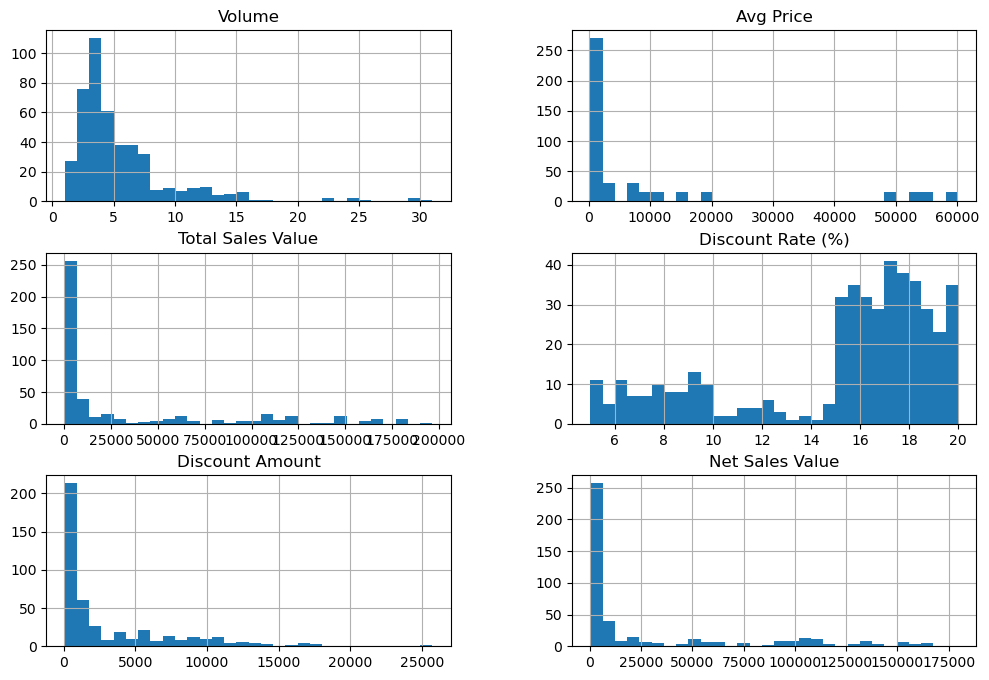

In [9]:
df[numerical_cols].hist(figsize=(12, 8), bins=30)

In [10]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [11]:
plt.show()

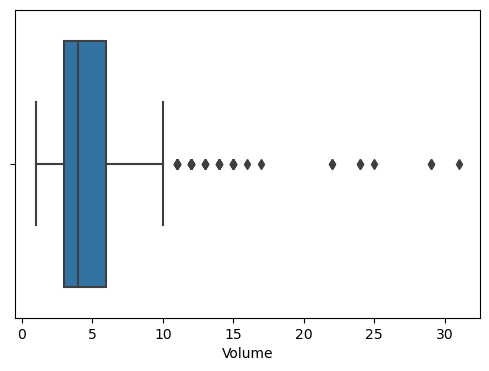

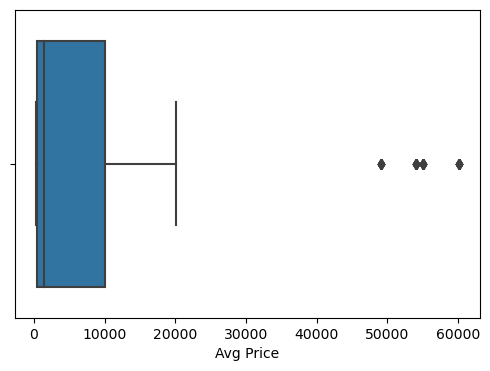

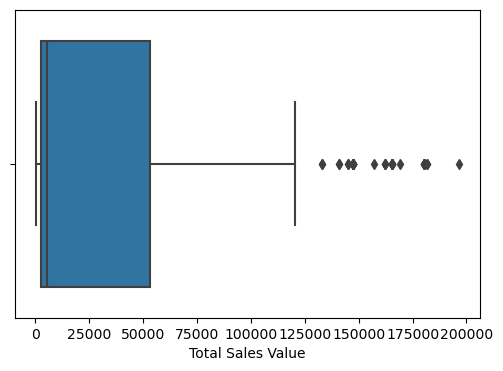

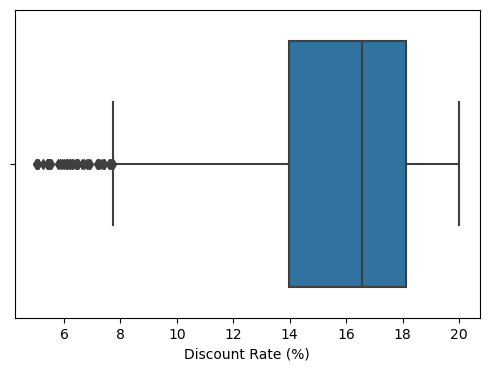

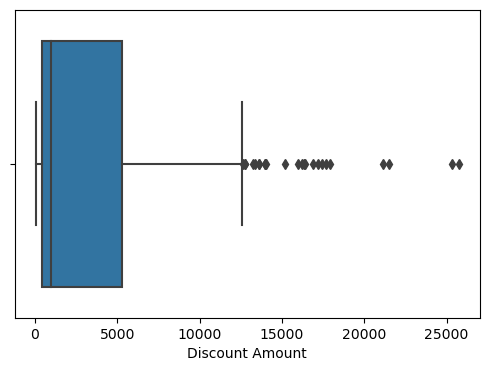

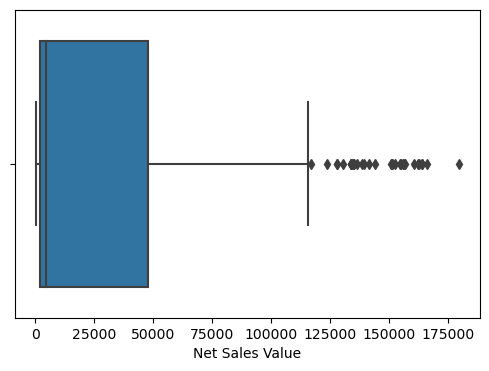

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])

Text(0.5, 1.0, 'Boxplot of Net Sales Value')

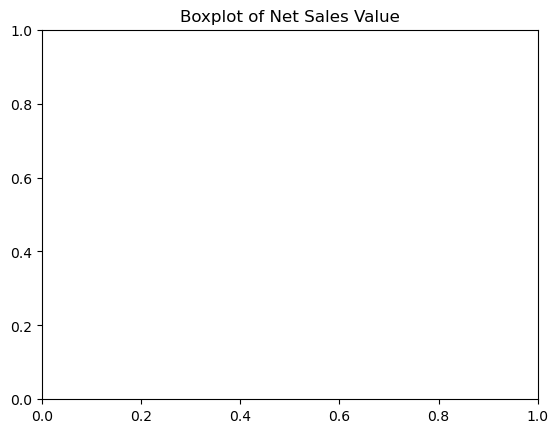

In [13]:
plt.title(f'Boxplot of {col}')

In [14]:
plt.show()

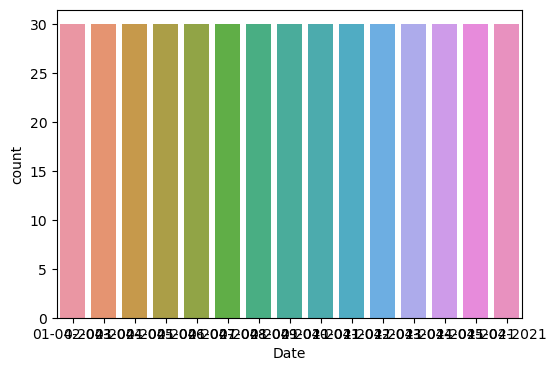

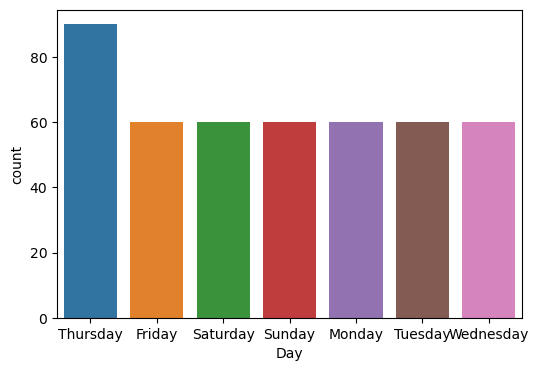

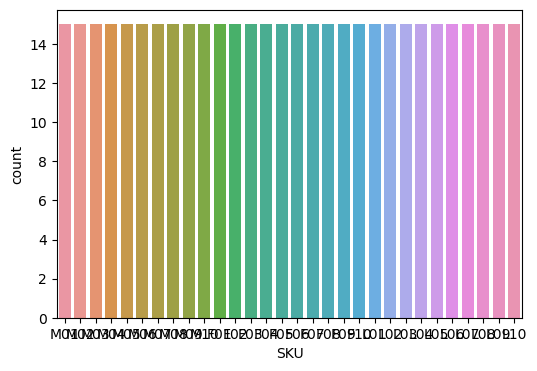

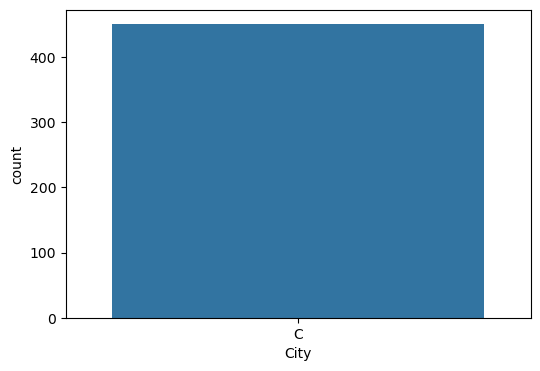

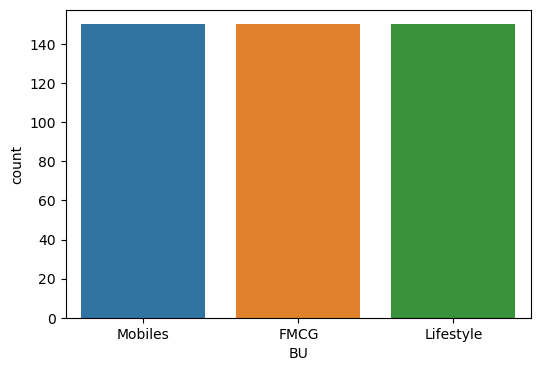

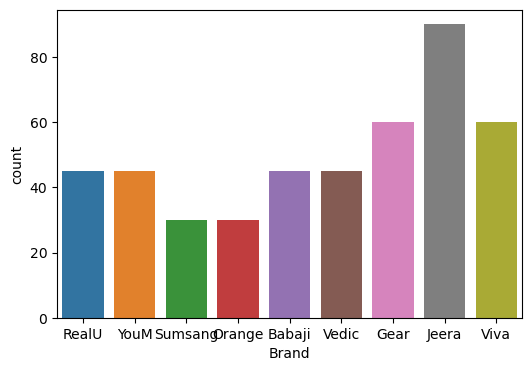

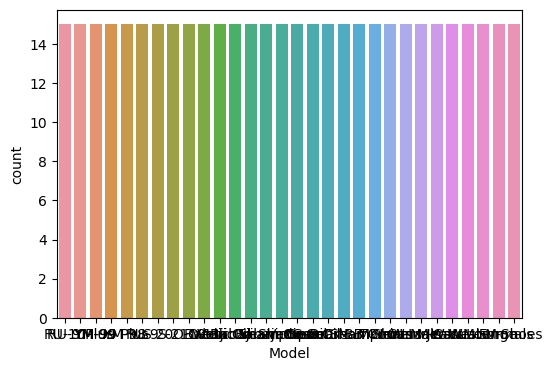

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)

Text(0.5, 1.0, 'Count Plot of Model')

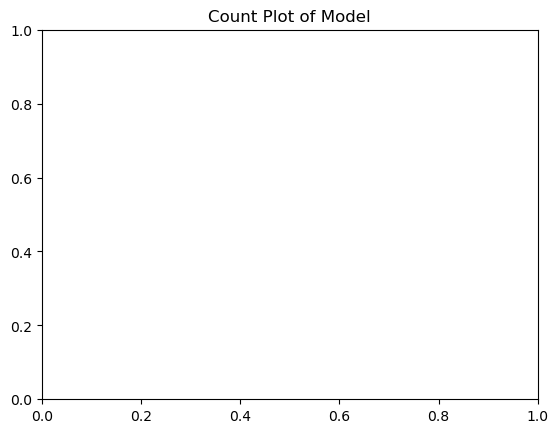

In [16]:
plt.title(f'Count Plot of {col}')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

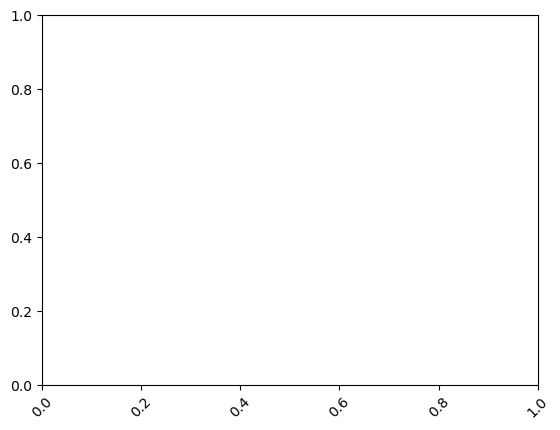

In [17]:
plt.xticks(rotation=45)

In [18]:
plt.show()

In [19]:
df_standardized = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_standardized[col] = (df[col] - mean) / std

In [20]:
print("Original Data:\n", df[numerical_cols].head())

Original Data:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [21]:
print("\nStandardized Data:\n", df_standardized[numerical_cols].head())


Standardized Data:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [22]:
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols)

In [23]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
